In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from PIL import Image

In [2]:
df = pd.read_csv('../Data/Masterchef.csv')

In [3]:
df.head(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,728166702677900,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,NaN,Bird mode engaged. 🔪🦃\n\nHappy Thanksgiving to...,2023-11-24 00:00:00,1700758800,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7281...,"{'thích': 369, 'yêu thích': 68, 'thương thương...",440,NaN,126204090726016,NaN,7.281667e+14,['728166672677903'],False,2023-11-26 09:13:35.208990
1,727642092730361,The Thanksgiving dishes are cooking now... 🦃\n...,The Thanksgiving dishes are cooking now... 🦃\n...,NaN,The Thanksgiving dishes are cooking now... 🦃\n...,2023-11-23 01:16:11,1700676971,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,https://scontent.fhan14-1.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-1.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 164, 'yêu thích': 28, 'thương thương...",193,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:51.364382
2,727607916067112,Who knew mashed potatoes were so complicated?!...,Who knew mashed potatoes were so complicated?!...,NaN,Who knew mashed potatoes were so complicated?!...,2023-11-23 00:02:37,1700672557,NaN,https://scontent.fhan14-3.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7276...,"{'thích': 58, 'yêu thích': 3, 'thương thương': 1}",62,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:13:57.246897
3,723706983123872,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,Amazing skills indeed! 🐟👏\n\n📺: MasterChef on ...,NaN,NaN,2023-11-16 01:06:57,1700071617,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],...,https://www.facebook.com/Masterchef/posts/7237...,"{'thích': 502, 'yêu thích': 62, 'haha': 1, 'wo...",581,"[{'name': 'Food Club FOX', 'link': '/FoodClubF...",126204090726016,NaN,NaN,[],False,2023-11-26 09:14:00.087903
4,722593639901873,Feel like your knife skills can't cut it? 🔪\n\...,Feel like your knife skills can't cut it? 🔪\n\...,NaN,NaN,2023-11-14 00:00:02,1699894802,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,https://scontent.fhan14-4.fna.fbcdn.net/v/t39....,['https://scontent.fhan14-4.fna.fbcdn.net/v/t3...,...,https://www.facebook.com/Masterchef/posts/7225...,"{'thích': 109, 'yêu thích': 7}",116,NaN,126204090726016,NaN,7.225936e+14,['722593623235208'],False,2023-11-26 09:14:22.171084


In [4]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [5]:
df['time'] = pd.to_datetime(df['time'])

### SỐ LƯỢNG BÀI ĐĂNG CỦA CÁC THỨ TRONG TUẦN

In [6]:
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.dayofweek

In [7]:
hourly_distribution = df['hour'].value_counts().sort_index()
weekday_distribution = df['weekday'].value_counts().sort_index()
print("Phân bố bài đăng theo giờ trong ngày:\n", hourly_distribution)
print("\nPhân bố bài đăng theo ngày trong tuần:\n", weekday_distribution)

Phân bố bài đăng theo giờ trong ngày:
 hour
0     65
1     42
2     36
3     28
4     16
5      9
6      2
7      1
8      1
9      1
11     1
19     8
20     4
21     4
22    12
23    70
Name: count, dtype: int64

Phân bố bài đăng theo ngày trong tuần:
 weekday
0    23
1    52
2    63
3    68
4    42
5    38
6    14
Name: count, dtype: int64


In [8]:
weekday_distribution

weekday
0    23
1    52
2    63
3    68
4    42
5    38
6    14
Name: count, dtype: int64

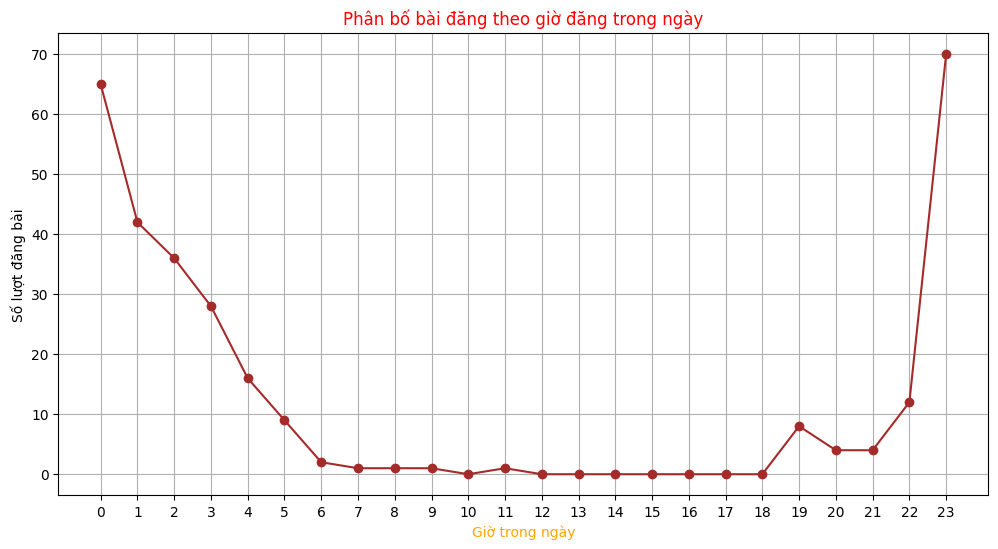

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

hourly_distribution = hourly_distribution.reindex(range(24), fill_value=0)

plt.figure(figsize=(12, 6))
plt.plot(hourly_distribution.index, hourly_distribution.values, marker='o', linestyle='-', color='brown') 
plt.xlabel('Giờ trong ngày', color = 'orange')
plt.ylabel('Số lượt đăng bài')
plt.title('Phân bố bài đăng theo giờ đăng trong ngày', color = 'red')
plt.grid(True)
plt.xticks(range(24))  
plt.show()

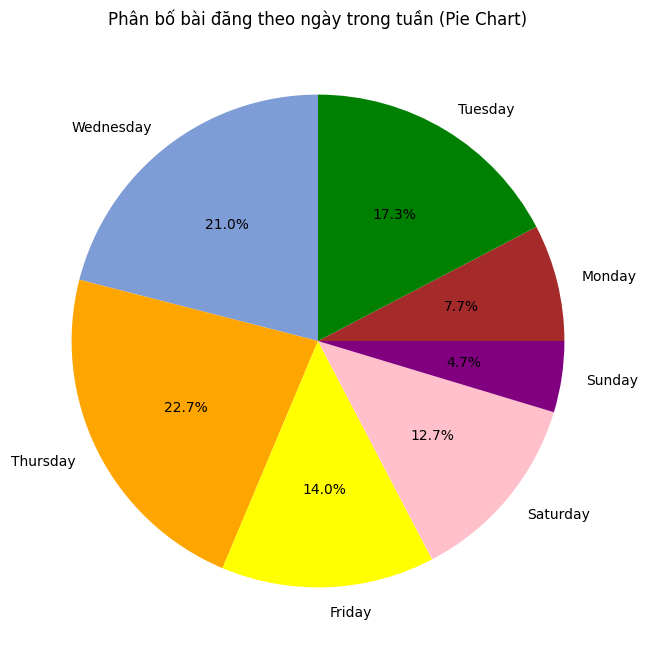

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(weekday_distribution.values, labels=day_names, autopct='%1.1f%%', colors=['brown', 'green', '#7e9cd5', 'orange', 'yellow', 'pink', 'purple'])  
plt.title('Phân bố bài đăng theo ngày trong tuần (Pie Chart)')
plt.show()


## PHÂN TÍCH GIỜ ĐĂNG HOẶC NGÀY ĐĂNG MÀ CÓ TỔNG REACTIONS LỚN NHẤT

#### TỔNG SỐ REACTIONS CỦA 1 BÀI ĐĂNG

In [11]:
df['reaction_count']

0        440
1        193
2         62
3        581
4        116
       ...  
295     3033
296     1301
297    19958
298        0
299     1037
Name: reaction_count, Length: 300, dtype: int64

#### PHÂN TÍCH THEO GIỜ

In [12]:
hourly_reaction_totals = df.groupby('hour')['reaction_count'].sum()

hourly_reaction_totals

hour
0      59896
1      34792
2      52922
3      37268
4      21566
5      36025
6       1044
7          0
8          0
9       6957
11     25272
19      9365
20       147
21      1301
22     13334
23    275363
Name: reaction_count, dtype: int64

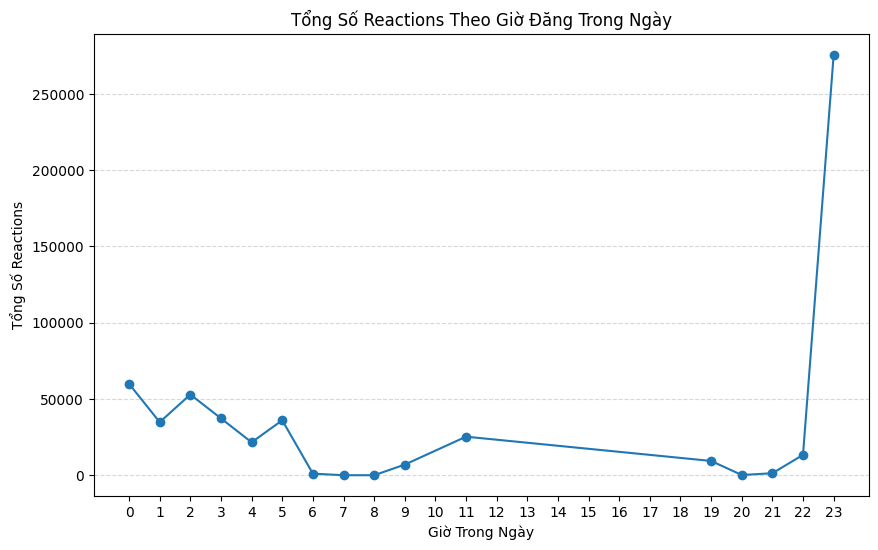

In [13]:
plt.figure(figsize=(10, 6))
hourly_reaction_totals.plot(kind='line', marker='o')

plt.title('Tổng Số Reactions Theo Giờ Đăng Trong Ngày')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Tổng Số Reactions')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, 24)) 
plt.show()

#### PHÂN TÍCH THEO NGÀY

In [14]:
weekday_reactions_total = df.groupby('weekday')['reaction_count'].sum()
weekday_reactions_total

weekday
0    110904
1     82071
2     57208
3    118394
4     36641
5     30847
6    139187
Name: reaction_count, dtype: int64

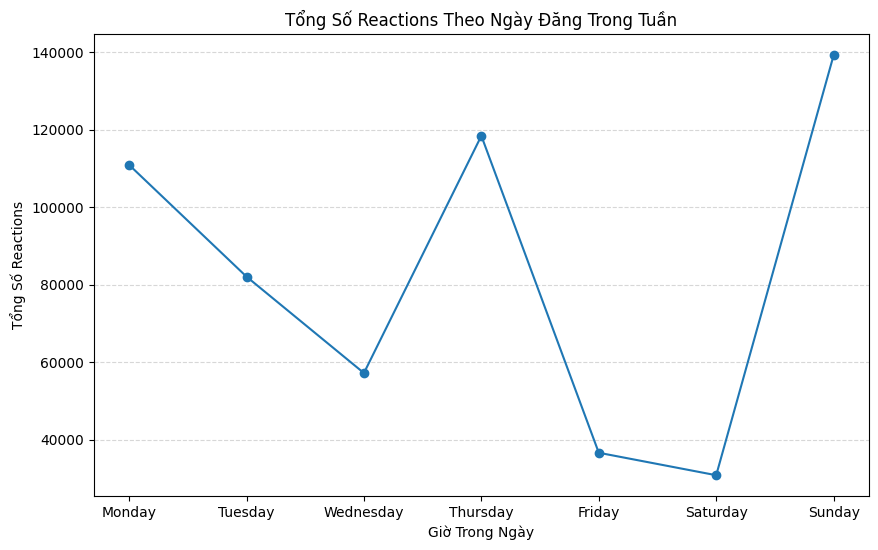

In [15]:
plt.figure(figsize=(10, 6))
weekday_reactions_total.plot(kind='line', marker='o')

plt.title('Tổng Số Reactions Theo Ngày Đăng Trong Tuần')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Tổng Số Reactions')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, 7), day_names) 
plt.show()

## PHÂN TÍCH SỐ REACTIONS CỦA TỪNG NGÀY TRONG TUẦN TRONG CÁC GIỜ ĐĂNG BÀI 

In [16]:
hourly_weekday_reaction_totals= df.groupby(['weekday', 'hour'])['reaction_count'].sum().unstack()

In [17]:
hourly_weekday_reaction_totals

hour,0,1,2,3,4,5,6,7,8,9,11,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,
0,2987.0,10789.0,3660.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.0,0.0,0.0,93321.0
1,31145.0,7238.0,1449.0,14986.0,8260.0,679.0,NaN,NaN,NaN,NaN,NaN,1773.0,NaN,1301.0,2150.0,13090.0
2,2158.0,3415.0,7329.0,9145.0,753.0,951.0,NaN,0.0,NaN,NaN,NaN,7592.0,NaN,NaN,554.0,25311.0
3,13299.0,2741.0,7974.0,6289.0,7549.0,32840.0,0.0,NaN,0.0,6957.0,25272.0,NaN,0.0,NaN,7692.0,7781.0
4,1468.0,4870.0,20585.0,3253.0,1366.0,1555.0,1044.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1976.0,524.0
5,4944.0,5403.0,11925.0,3388.0,3638.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962.0,587.0
6,3895.0,336.0,NaN,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134749.0


#### CHUYỂN NAN THÀNH 0

In [18]:
hourly_weekday_reaction_totals.fillna(0, inplace=True)
hourly_weekday_reaction_totals

hour,0,1,2,3,4,5,6,7,8,9,11,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,
0,2987.0,10789.0,3660.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,147.0,0.0,0.0,93321.0
1,31145.0,7238.0,1449.0,14986.0,8260.0,679.0,0.0,0.0,0.0,0.0,0.0,1773.0,0.0,1301.0,2150.0,13090.0
2,2158.0,3415.0,7329.0,9145.0,753.0,951.0,0.0,0.0,0.0,0.0,0.0,7592.0,0.0,0.0,554.0,25311.0
3,13299.0,2741.0,7974.0,6289.0,7549.0,32840.0,0.0,0.0,0.0,6957.0,25272.0,0.0,0.0,0.0,7692.0,7781.0
4,1468.0,4870.0,20585.0,3253.0,1366.0,1555.0,1044.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1976.0,524.0
5,4944.0,5403.0,11925.0,3388.0,3638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,962.0,587.0
6,3895.0,336.0,0.0,207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,134749.0


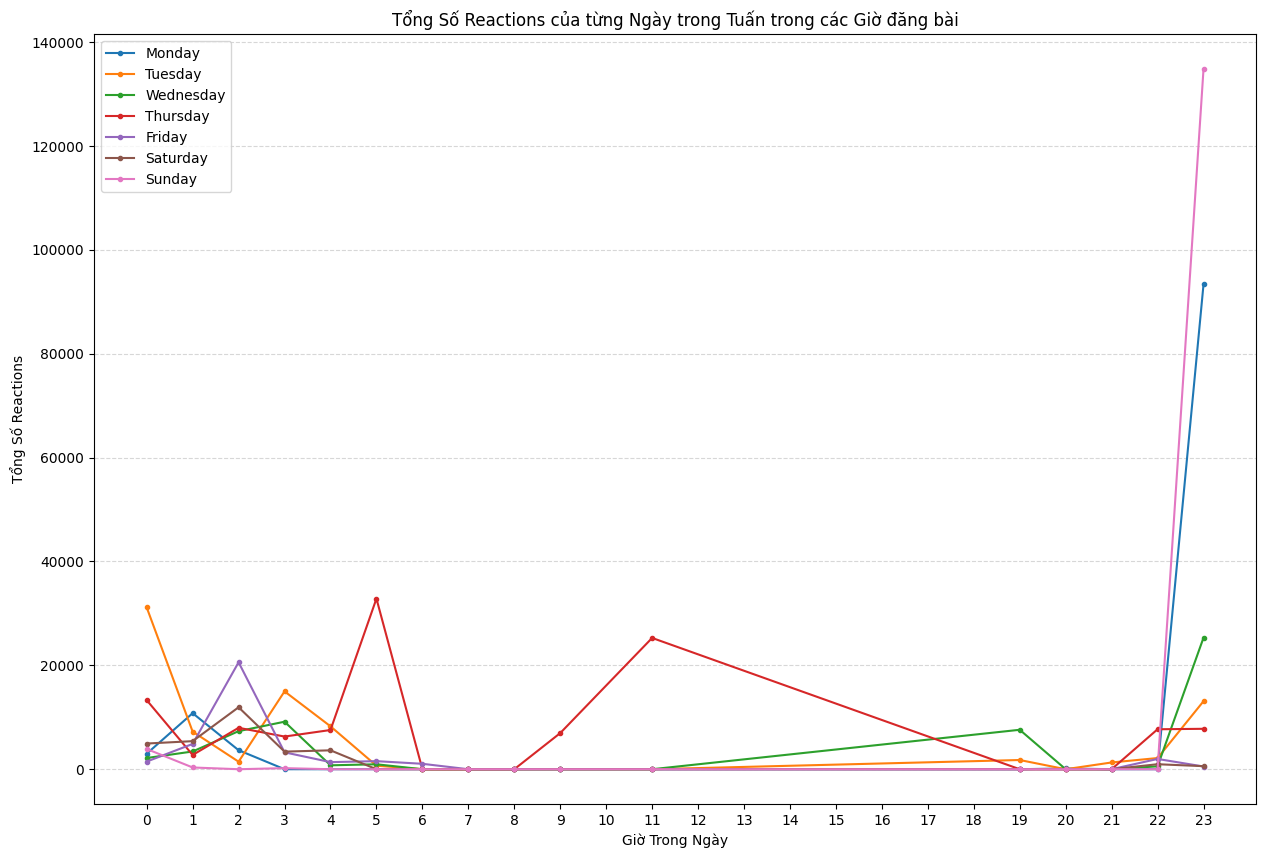

In [19]:
plt.figure(figsize=(15, 10))
for day in hourly_weekday_reaction_totals.index:
    plt.plot(hourly_weekday_reaction_totals.columns, hourly_weekday_reaction_totals.loc[day], marker='.', linestyle='-', label=day_names[day])

plt.title('Tổng Số Reactions của từng Ngày trong Tuấn trong các Giờ đăng bài')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Tổng Số Reactions')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(24))
plt.show()

#### XEM KỸ HƠN TỪ 0 ĐẾN 5 GIỜ

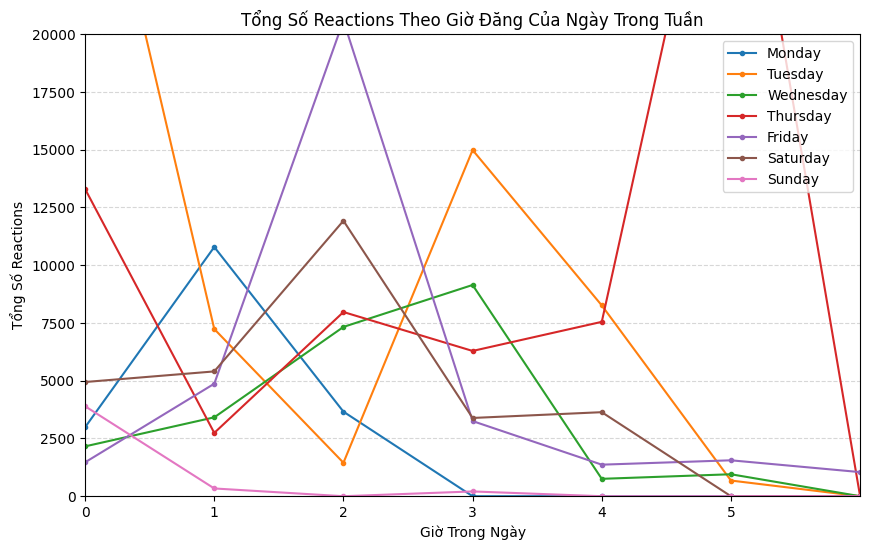

In [20]:
plt.figure(figsize=(10, 6))
for day in hourly_weekday_reaction_totals.index:
    plt.plot(hourly_weekday_reaction_totals.columns, hourly_weekday_reaction_totals.loc[day], marker='.', linestyle='-', label=day_names[day])

plt.title('Tổng Số Reactions Theo Giờ Đăng Của Ngày Trong Tuần')
plt.xlabel('Giờ Trong Ngày')
plt.ylabel('Tổng Số Reactions')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 6)  # Giới hạn phạm vi trục x từ 0 đến 5 giờ
plt.ylim(0, 20000)  # Giới hạn phạm vi trục y từ 0 đến 20,000 reactions
plt.xticks(range(6))
plt.show()
